In [1]:
# 필요 라이브러리 임포트 및 자료 가져오기

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

train_df_cleaned = pd.read_csv('./house_prediction/train.csv')
test_df = pd.read_csv('./house_prediction/test.csv')


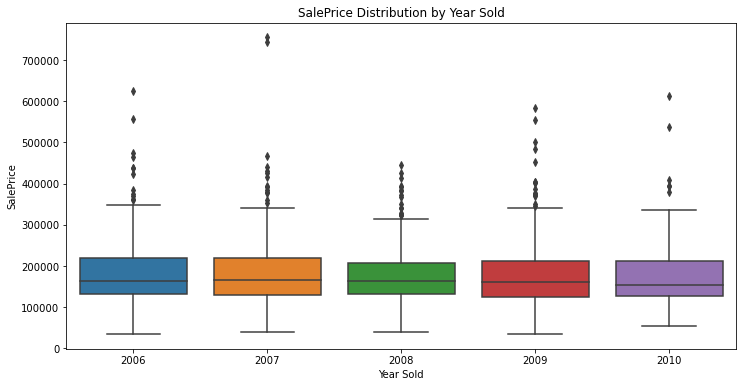

In [2]:
# 연을 기준으로 매매된 주택 가격 박스 플롯으로 시각화

plt.figure(figsize=(12, 6))
sns.boxplot(x='YrSold', y='SalePrice', data=train_df_cleaned)
plt.title('SalePrice Distribution by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('SalePrice')
plt.show()


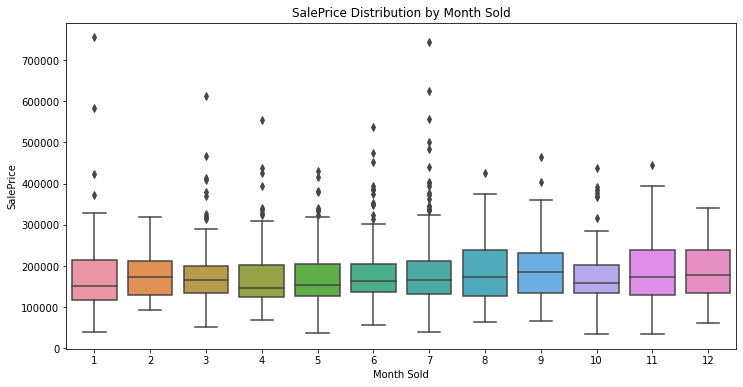

In [3]:
# 월을 기준으로 매매된 주택 가격 박스 플롯으로 시각화

plt.figure(figsize=(12, 6))
sns.boxplot(x='MoSold', y='SalePrice', data=train_df_cleaned)
plt.title('SalePrice Distribution by Month Sold')
plt.xlabel('Month Sold')
plt.ylabel('SalePrice')
plt.show()


In [4]:
# 판매 타입과 판매 조건을 상관관계 분석위해 인코딩

train_df_encoded = train_df_cleaned.copy()
train_df_encoded['SaleType'] = train_df_encoded['SaleType'].astype('category').cat.codes
train_df_encoded['SaleCondition'] = train_df_encoded['SaleCondition'].astype('category').cat.codes

In [5]:
# 상관관계 분석

transaction_features = ['SalePrice', 'YrSold', 'MoSold', 'SaleType', 'SaleCondition']
transaction_corr = train_df_encoded[transaction_features].corr()

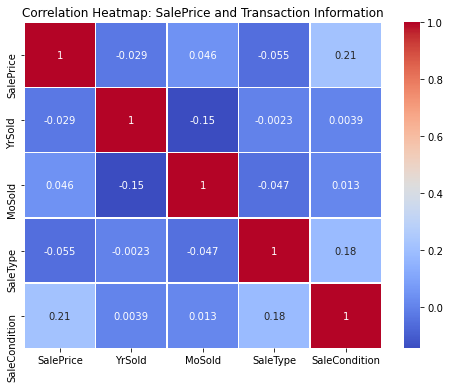

In [6]:
# 상관관계 히트맵 분석
plt.figure(figsize=(8, 6))
sns.heatmap(transaction_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: SalePrice and Transaction Information')
plt.show()

In [7]:
# 시계열 자료로 모델링

X_transaction = train_df_encoded[['YrSold', 'MoSold', 'SaleType', 'SaleCondition']]
y = train_df_encoded['SalePrice']


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 훈련
X_train_ts, X_val_ts, y_train_ts, y_val_ts = train_test_split(X_transaction, y, test_size=0.2, random_state=42)

In [9]:
# 선형 회귀 분석
model_ts = LinearRegression()
model_ts.fit(X_train_ts, y_train_ts)

LinearRegression()

In [10]:
#예측 및 퍼포먼스 성능 평가
y_pred_ts = model_ts.predict(X_val_ts)
rmse_ts = np.sqrt(mean_squared_error(y_val_ts, y_pred_ts))

transaction_corr, rmse_ts

(               SalePrice    YrSold    MoSold  SaleType  SaleCondition
 SalePrice       1.000000 -0.028923  0.046432 -0.054911       0.213092
 YrSold         -0.028923  1.000000 -0.145721 -0.002327       0.003880
 MoSold          0.046432 -0.145721  1.000000 -0.047386       0.013320
 SaleType       -0.054911 -0.002327 -0.047386  1.000000       0.184067
 SaleCondition   0.213092  0.003880  0.013320  0.184067       1.000000,
 83714.86084427)

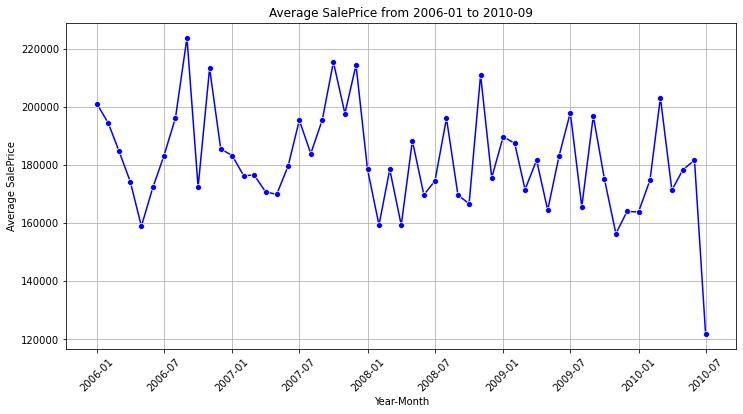

In [11]:
# 연월 피처 새로 만들기.
train_df_cleaned['YearMonth'] = train_df_cleaned['YrSold'].astype(str) + '-' + train_df_cleaned['MoSold'].astype(str).str.zfill(2)

# 연월 정보를 시계열 정보로 변환
train_df_cleaned['YearMonth'] = pd.to_datetime(train_df_cleaned['YearMonth'], format='%Y-%m')

# 연월을 묶어서 평균 가격으로 표현하기.
year_month_avg_price = train_df_cleaned.groupby('YearMonth')['SalePrice'].mean()

# 시계열 자료 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_month_avg_price.index, y=year_month_avg_price.values, marker='o', color='b')
plt.title('Average SalePrice from 2006-01 to 2010-09')
plt.xlabel('Year-Month')
plt.ylabel('Average SalePrice')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [12]:
# 연월으로 시계열 자료
train_df_cleaned['Year'] = train_df_cleaned['YearMonth'].dt.year
train_df_cleaned['Month'] = train_df_cleaned['YearMonth'].dt.month


In [13]:
train_df_cleaned.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearMonth,Year,Month
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,2008-02-01,2008,2
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,2007-05-01,2007,5
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,2008-09-01,2008,9
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,2006-02-01,2006,2
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,2008-12-01,2008,12


In [14]:
#선형회귀 시계열 피처 선택
X_time_series = train_df_cleaned[['Year', 'Month']]
y_time_series = train_df_cleaned['SalePrice']

In [15]:
# 테스트 데이터 분리 
X_train_ts, X_val_ts, y_train_ts, y_val_ts = train_test_split(X_time_series, y_time_series, test_size=0.2, random_state=42)

In [16]:
# 선형회귀 
model_time_series = LinearRegression()
model_time_series.fit(X_train_ts, y_train_ts)

LinearRegression()

In [17]:
# 예측 및 퍼포먼스 평가

y_pred_ts = model_time_series.predict(X_val_ts)
rmse_time_series = np.sqrt(mean_squared_error(y_val_ts, y_pred_ts))
rmse_time_series

87451.03157874306

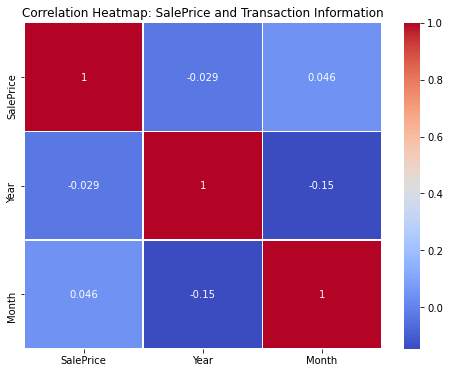

In [18]:
transaction_features = ['SalePrice', 'Year', 'Month', 'SaleType', 'SaleCondition']
transaction_corr = train_df_cleaned[transaction_features].corr()
# 상관관계 히트맵 분석
plt.figure(figsize=(8, 6))
sns.heatmap(transaction_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: SalePrice and Transaction Information')
plt.show()

In [19]:
train_df_cleaned['Year'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: Year, dtype: int64

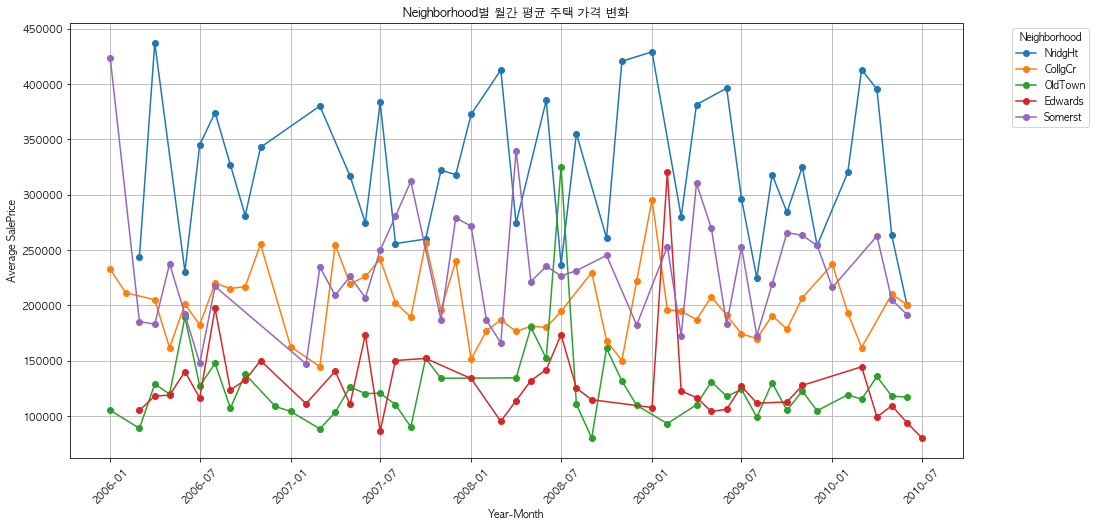

In [24]:
import matplotlib as mpl
import warnings

mpl.rcParams['font.family'] = 'AppleGothic'  # 또는 'Malgun Gothic'

warnings.filterwarnings("ignore", category=RuntimeWarning)

# 그래프 그리기
neighborhood_ts = train_df_cleaned.groupby(['Neighborhood', 'YearMonth'])['SalePrice'].mean().reset_index()

plt.figure(figsize=(16, 8))
neighborhoods_to_plot = ['NridgHt', 'CollgCr', 'OldTown', 'Edwards', 'Somerst']

for neighborhood in neighborhoods_to_plot:
    data = neighborhood_ts[neighborhood_ts['Neighborhood'] == neighborhood]
    plt.plot(data['YearMonth'], data['SalePrice'], marker='o', label=neighborhood)

plt.title('Neighborhood별 월간 평균 주택 가격 변화')
plt.xlabel('Year-Month')
plt.ylabel('Average SalePrice')
plt.xticks(rotation=45)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

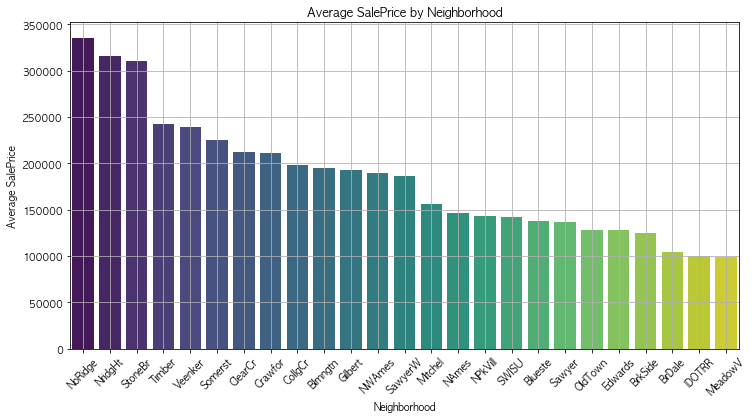

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64


In [25]:
# Neighborhood별 평균 주택 가격 계산
neighborhood_avg_price = train_df_cleaned.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

# 시각화: Neighborhood별 평균 주택 가격
plt.figure(figsize=(12, 6))
sns.barplot(x=neighborhood_avg_price.index, y=neighborhood_avg_price.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average SalePrice by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average SalePrice')
plt.grid(True)
plt.show()

# 참고용으로 평균 가격 데이터 표시
print(neighborhood_avg_price)


In [26]:
# 25개의 nominal 값을 5년에 걸쳐 거래내역을 확인하는게 의미가 적을 것 같음.
# 지역에 따른 시계열 분석에 한계가 명확해 보임.

In [27]:
neighborhood_ts

,Neighborhood,YearMonth,SalePrice
0,Blmngtn,2006-03-01,167240.000000
1,Blmngtn,2006-04-01,213490.000000
2,Blmngtn,2006-05-01,196870.000000
3,Blmngtn,2006-10-01,248379.666667
4,Blmngtn,2007-02-01,194201.000000
...,...,...,...
672,Veenker,2007-07-01,256000.000000
673,Veenker,2007-08-01,187000.000000
674,Veenker,2008-05-01,324000.000000
675,Veenker,2008-06-01,162500.000000


In [28]:
train_df_encoded['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [33]:
train_df_encoded['Neighborhood'].nunique()

25